In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

In [336]:
df=pd.read_csv("./cars24data.csv")

In [337]:
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [338]:
df.shape

(1445, 11)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [340]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


In [341]:
df.isna().sum()

Model Name            0
Price                 0
Manufacturing_year    0
Engine capacity       0
Spare key             0
Transmission          0
KM driven             0
Ownership             0
Fuel type             0
Imperfections         0
Repainted Parts       0
dtype: int64

In [342]:
df['Model Name'].nunique()

573

### Great! There are no missing values in the dataset. Let's clean the 'Model Name' column as it has some irrelevant information

In [343]:
df['Model Name']=df['Model Name'].apply(lambda x: x[12:])

### So, first I removed the year from the 'Model Name' as we can see that information in the 'Manufacturing_year' column. Then I observed that the car brand is Maruti only, the dataset does not have any other brand. So, keeping the keyword "Maruti" is irrelevant

### Let's convert New-Wagon R to Wagon R because we can see that the model is new or old from the Manufacturing_year column

In [344]:
df['Model Name'] = df['Model Name'].apply(lambda x: "Wagon R" if "New Wagon-R" in x else x)

### Alright! Let's just keep the "Model Name" values like Ignis or Wagon or Baleno and not Ignis Delta or something like that for analysis

In [345]:
df['Model Name'].sample(10)

438                    Alto K10 VXI
349                       Swift VXI
530             Wagon R 1.0 LXI CNG
953     Baleno ALPHA CVT PETROL 1.2
1067                Swift Dzire ZXI
536                 Swift Dzire VXI
1203                  S PRESSO VXI+
890         Eeco 5 STR WITH A/C+HTR
269                   Ciaz VDI SHVS
95                  IGNIS DELTA 1.2
Name: Model Name, dtype: object

### So, I just want the value at the 0th index to get the values I mentioned above in the Model Name column

In [346]:
df['Model Name'] = df['Model Name'].apply(lambda x: x.split()[0])  

In [347]:
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,Swift,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,Baleno,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,Swift,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,Ertiga,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,Dzire,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [348]:
df['Model Name'].nunique()

20

### Great! So, from 573 unique values, we have come down to 20. Let's see the unique values now

In [350]:
df['Model Name'].unique()

array(['Swift', 'Baleno', 'Ertiga', 'Dzire', 'Alto', 'S', 'Celerio',
       'IGNIS', 'Wagon', 'Ciaz', 'Vitara', 'BREZZA', 'XL6', 'Ritz',
       'Eeco', 'Grand', 'OMNI', 'Zen', 'A', 'Omni'], dtype=object)

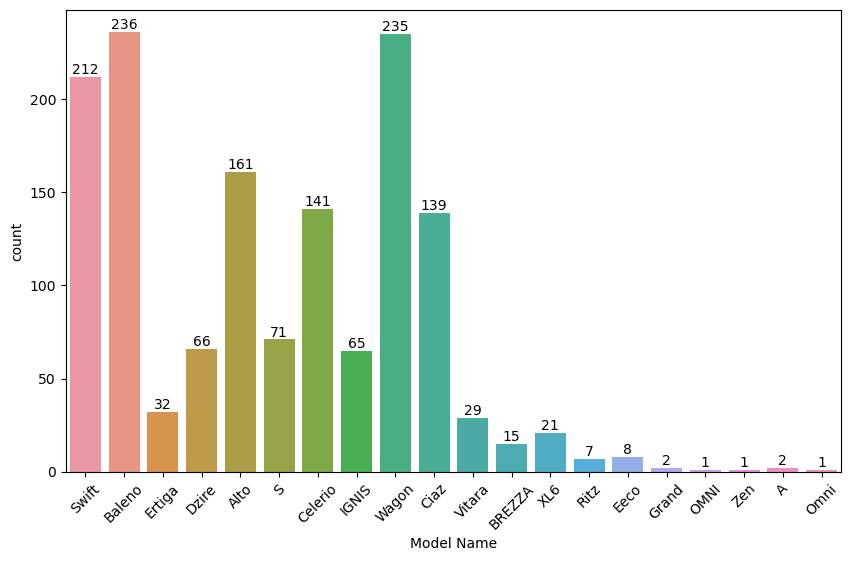

In [351]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Model Name', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

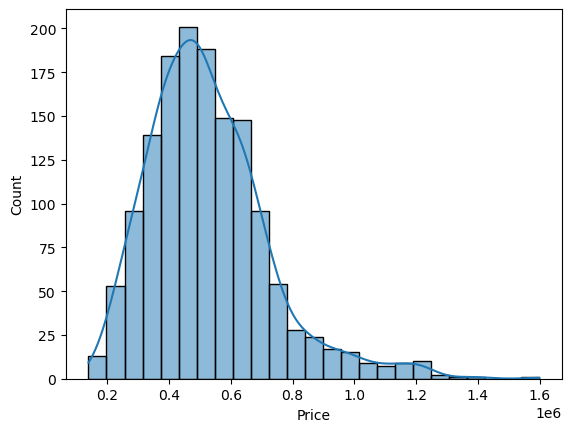

In [352]:
sns.histplot(df['Price'], bins=25, kde=True)
plt.show()

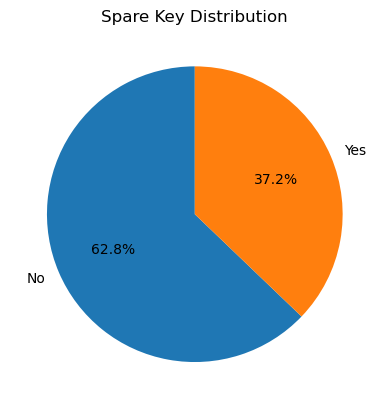

In [353]:
labels = df['Spare key'].unique()  # Get unique values for labels automatically
sizes = df['Spare key'].value_counts().values  # Get counts for each unique value

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Spare Key Distribution')
plt.show()

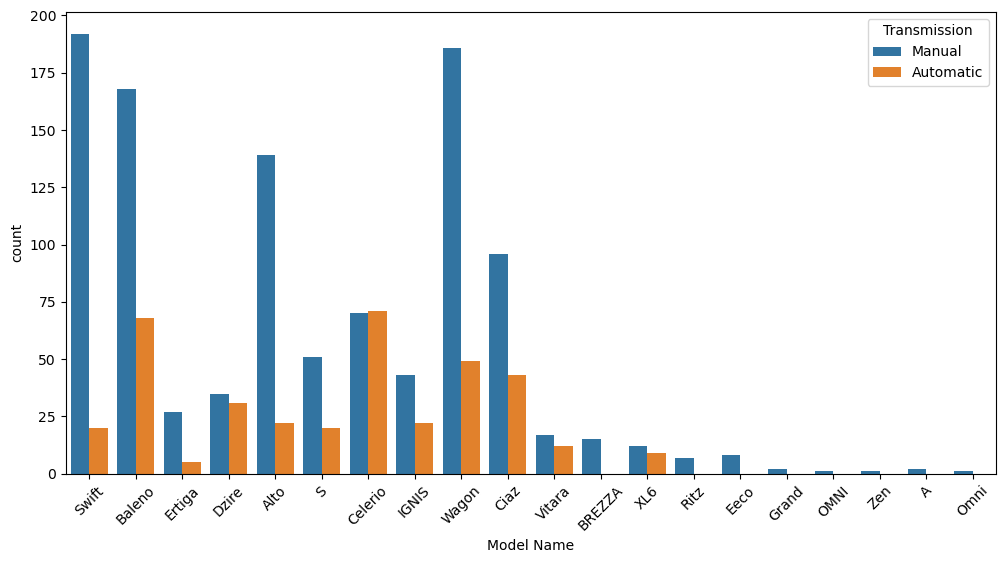

In [354]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Model Name", hue="Transmission", data=df)
plt.xticks(rotation=45)
plt.show()

### We have a lot of manual cars in the dataset compared to Automatic

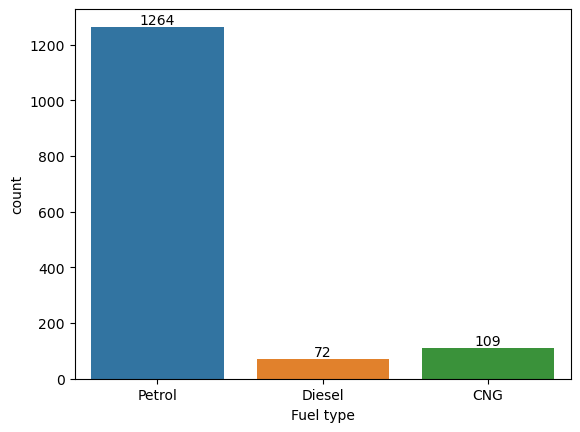

In [355]:
ax=sns.countplot(x="Fuel type", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

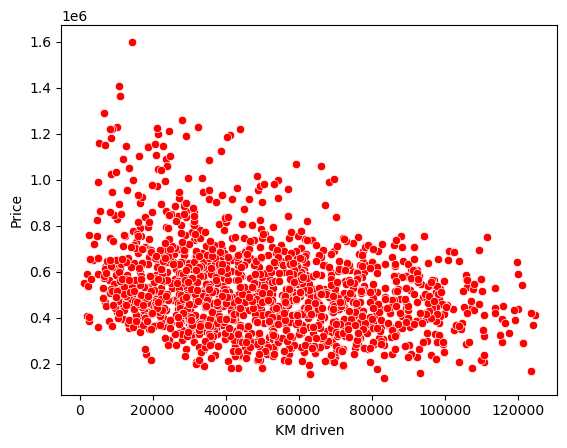

In [356]:
sns.scatterplot(x="KM driven", y="Price", data=df, color='red')
plt.show()

In [357]:
print("Minimum number of previous owners", df['Ownership'].min())
print("Maximum number of previous owners", df['Ownership'].max())

Minimum number of previous owners 1
Maximum number of previous owners 3


In [358]:
print("Maximum price of the car with only 1 previous owner:", df.Price[df["Ownership"]==1].max())
print("Maximum price of the car with 3 previous owners:", df.Price[df["Ownership"]==3].max())
print("\n")
print("Minimum price of the car with only 1 previous owner:", df.Price[df["Ownership"]==1].min())
print("Minimum price of the car with 3 previous owners:", df.Price[df["Ownership"]==3].min())

Maximum price of the car with only 1 previous owner: 1599000
Maximum price of the car with 3 previous owners: 601000


Minimum price of the car with only 1 previous owner: 139000
Minimum price of the car with 3 previous owners: 181000


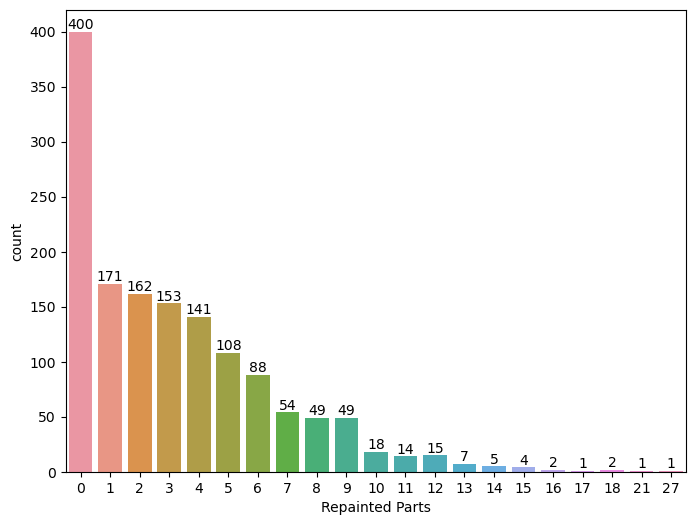

In [359]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x="Repainted Parts", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

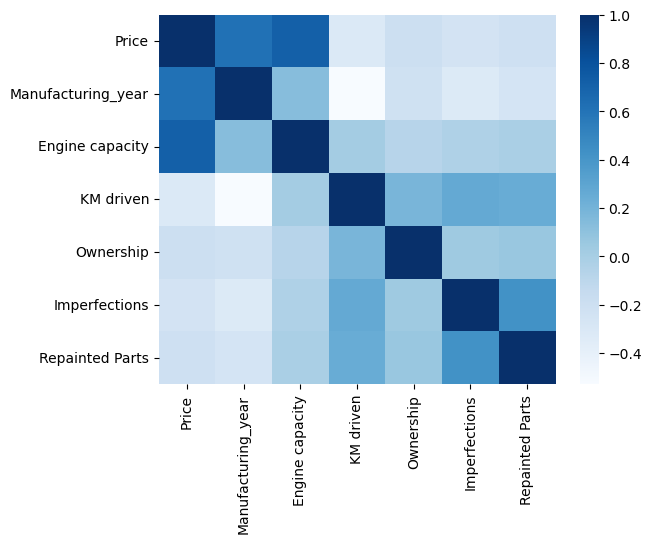

In [360]:
sns.heatmap(df.corr(), cmap="Blues")
plt.show()

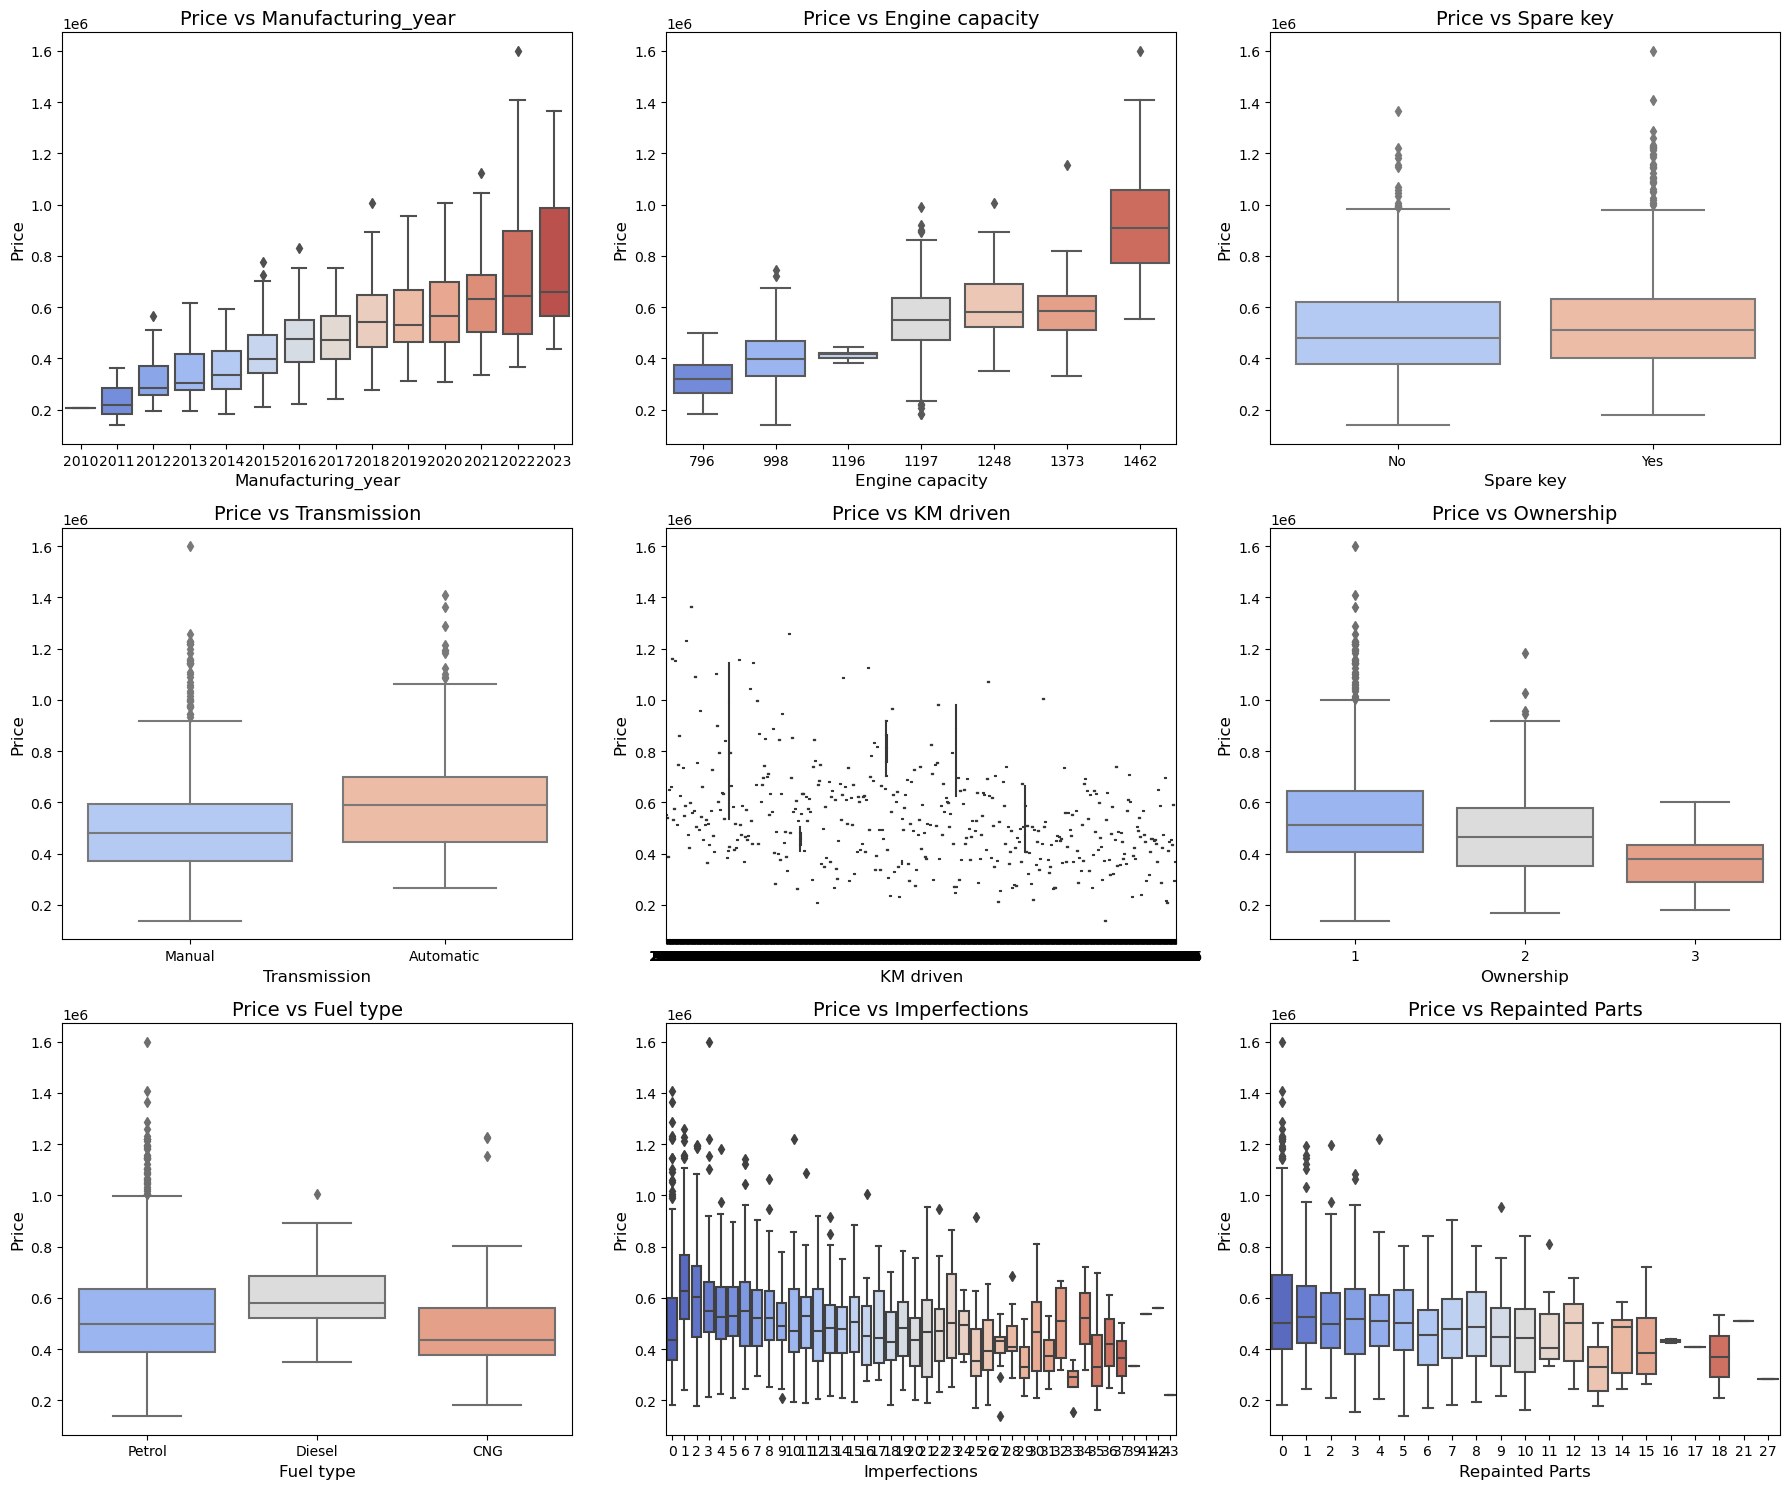

In [361]:
features = ["Manufacturing_year", "Engine capacity", "Spare key", "Transmission",
            "KM driven", "Ownership", "Fuel type", "Imperfections", "Repainted Parts"]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], y=df["Price"], palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"Price vs {feature}", fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Price", fontsize=12)
plt.tight_layout()
plt.show()

In [362]:
object_cols=[]
for cols in df.select_dtypes(include=['object']).columns:
    object_cols.append(cols)

In [363]:
object_cols

['Model Name', 'Spare key', 'Transmission', 'Fuel type']

In [364]:
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,Swift,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,Baleno,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,Swift,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,Ertiga,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,Dzire,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [365]:
encoder=LabelEncoder()
for cols in object_cols:
    df[cols]=encoder.fit_transform(df[cols])

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Model Name          1445 non-null   int64
 1   Price               1445 non-null   int64
 2   Manufacturing_year  1445 non-null   int64
 3   Engine capacity     1445 non-null   int64
 4   Spare key           1445 non-null   int64
 5   Transmission        1445 non-null   int64
 6   KM driven           1445 non-null   int64
 7   Ownership           1445 non-null   int64
 8   Fuel type           1445 non-null   int64
 9   Imperfections       1445 non-null   int64
 10  Repainted Parts     1445 non-null   int64
dtypes: int64(11)
memory usage: 124.3 KB


In [367]:
X=df.drop(columns=['Price'])
y=df['Price']

In [368]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [369]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1156, 10)
X_test shape: (289, 10)
y_train shape: (1156,)
y_test shape: (289,)


### Let's start with linear regression to predict the price

In [370]:
linear_model=LinearRegression()

In [371]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [372]:
linear_model_pred=linear_model.predict(X_test)

In [373]:
print("Linear Model Scores:")
print("R2 score:", r2_score(y_test, linear_model_pred))
print("Mean squared error:", mean_squared_error(y_test, linear_model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, linear_model_pred))

Linear Model Scores:
R2 score: 0.8028243203855046
Mean squared error: 6569217391.264525
Mean absolute error: 61383.04039990234


### Even though the r2_score is good, but the mean squared error is a lot. Let's try a different model and see the results

### Decision Tree Regressor

In [374]:
dt_model=DecisionTreeRegressor()

In [375]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [376]:
dt_model_pred=dt_model.predict(X_test)

In [377]:
print("Decision Tree Regressor Model Scores:")
print("R2 score:", r2_score(y_test, dt_model_pred))
print("Mean squared error:", mean_squared_error(y_test, dt_model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, dt_model_pred))

Decision Tree Regressor Model Scores:
R2 score: 0.8206407014752904
Mean squared error: 5975636678.200692
Mean absolute error: 56273.35640138408


### Alright! The basic Decision Tree Regressor Model (without hyperparameter tuning) is giving us better results than Linear Regression Model. The r2_score is increased from 0.80 to 0.82, and the mean_absolute_error came down from Rs. 61.3k to 56.2k

### Grid Search CV

In [379]:
params = {
    "max_depth": [5, 8, 10, 12, 15, None],
    "min_samples_leaf": [1, 2, 3, 4, 5],  # Removed None
    "criterion": ["squared_error", "absolute_error"]  # Corrected the "entropy" key
}

optimized_dt_model_using_gscv=GridSearchCV(estimator=dt_model, param_grid=params, cv=5, scoring="r2")

In [381]:
optimized_dt_model_using_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 8, 10, 12, 15, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='r2')

In [382]:
print("Best Parameters:", optimized_dt_model_using_gscv.best_params_)
print("Best R2 Score:", optimized_dt_model_using_gscv.best_score_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 4}
Best R2 Score: 0.8665933849537367


### Optimized Decision Tree Regresssor Model using GridSearchCV and fine-tuninig hyperparameters

In [384]:
optimized_dt_model=DecisionTreeRegressor(criterion= 'squared_error', max_depth= 8, min_samples_leaf= 4)

In [386]:
optimized_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4)

In [387]:
optimized_dt_model_pred=optimized_dt_model.predict(X_test)

In [388]:
print("Optimized Decision Tree Regressor Model Scores:")
print("R2 score:", r2_score(y_test, optimized_dt_model_pred))
print("Mean squared error:", mean_squared_error(y_test, optimized_dt_model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, optimized_dt_model_pred))

Optimized Decision Tree Regressor Model Scores:
R2 score: 0.8317156671735371
Mean squared error: 5606656804.948457
Mean absolute error: 51830.47903969207


### Great! The r2_score increased from 0.82 to 0.83, and the mean_absolute_error dropped to Rs 51.8k

### Let's try Ensemble Learning method using the Random Forest Algorithm

In [391]:
rf_model=RandomForestRegressor()

In [392]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [393]:
rf_model_pred=rf_model.predict(X_test)

In [394]:
print("Random Forest Regressor Model Scores:")
print("R2 score:", r2_score(y_test, rf_model_pred))
print("Mean squared error:", mean_squared_error(y_test, rf_model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, rf_model_pred))

Random Forest Regressor Model Scores:
R2 score: 0.8691213321735144
Mean squared error: 4360428337.370242
Mean absolute error: 46003.28719723183


### Amazing! The r2_score is 0.86 now, and mean_absolute_error is Rs 46K